In [29]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [30]:
import os
print(os.getcwd())

C:\Users\Cheng\OneDrive\Documents\Proj\VarianceArithemtic\IPyNb


In [31]:
df = pd.read_csv("../Python/Output/LogVar.txt", sep='\t')
df.head()

,NoiseType,Noise,X,log,Error Deviation,Error Minimum,Error Maximum,Value Deviation,Uncertainty,Mean,...,1.1,1.3,1.5,1.7,1.9,2.1,2.3,2.5,2.7,2.9
0,Gaussian,0.2,1.0,0.000000,1.029869,-20.948248,2.807345,0.218337,0.212005,-0.020484,...,0.236967,0.172431,0.094787,0.061511,0.027730,0.012605,0.007563,0.000000,0.000000,0.001008
1,Uniform,0.2,1.0,0.000000,0.971517,-2.005971,1.402997,0.205966,0.212005,-0.020769,...,0.386461,0.402960,0.006499,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,Gaussian,0.2,2.0,0.693147,1.005105,-6.727055,3.368547,0.101815,0.101297,-0.004399,...,0.226085,0.182878,0.130627,0.076367,0.053758,0.031652,0.014068,0.010048,0.005024,0.001005
3,Uniform,0.2,2.0,0.693147,0.994303,-1.877625,1.576934,0.100720,0.101297,-0.005047,...,0.326967,0.333467,0.300970,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,Gaussian,0.2,4.0,1.386294,1.004632,-5.657448,3.690329,0.050390,0.050157,-0.000903,...,0.230283,0.183123,0.140979,0.083283,0.059703,0.039133,0.022577,0.009532,0.009532,0.004515


In [32]:
sorted(df['Noise'].unique())

[1e-16,
 1e-15,
 1e-14,
 1e-13,
 1e-12,
 1e-11,
 1e-10,
 1e-09,
 1e-08,
 1e-07,
 1e-06,
 1e-05,
 0.0001,
 0.001,
 0.01,
 0.1,
 0.2]

In [33]:
sorted(df['X'].unique())

[0.03125, 0.05, 0.0625, 0.1, 0.125, 0.25, 0.5, 1.0, 2.0, 4.0, 8.0, 16.0, 32.0]

In [34]:
sNoise=sorted(df[df['Noise'] > 1e-5]['Noise'].unique())

# Deviation vs Uncertainty

In [35]:
def PlotValues( sValue=['Value Deviation', 'Uncertainty'], 
                sNoise=sNoise, noiseType='Gaussian',
                sStyle=['x', '-', '--', '+'], sColor = ['r','g','b','y','c','m'],
                logx=True, logy=True, xlim=[], ylim=[]):
    fig, ax = plt.subplots()
    if logx:
        ax.set_xscale('log')
    if logy:
        ax.set_yscale('log')
    if ylim:
        ax.set_ylim(ylim)
    ax.set_title('log(x +/- noise)')
    ax.set_xlabel('x')
    ax.set_ylabel(' or '.join(sValue))
    plt.grid(True)
    for noise, color in zip(sNoise, sColor):
        for value, style in zip(sValue, sStyle):
            dfPlot = df[(df['NoiseType']==noiseType) & (df['Noise']==noise)].sort_values('X')
            if dfPlot.empty:
                continue
            ax.plot(dfPlot['X'], dfPlot[value], ''.join([color, style]), label=f'{noise} {value}')
    ax.legend(bbox_to_anchor=(1.1, 1.05))

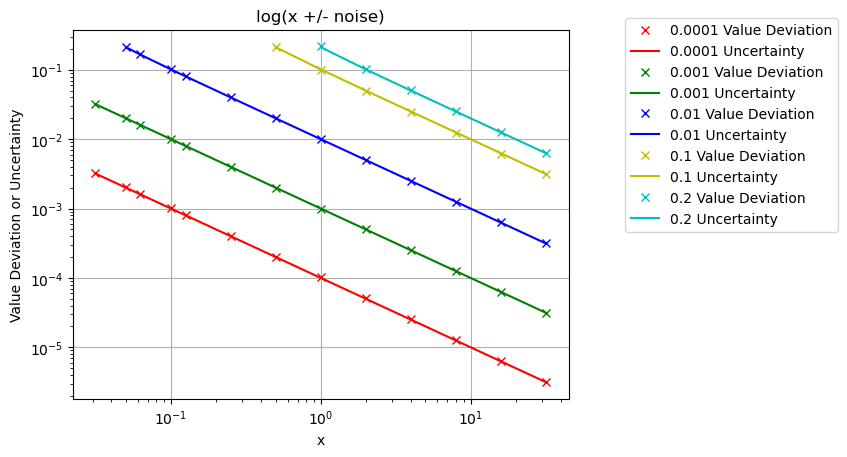

In [36]:
PlotValues()

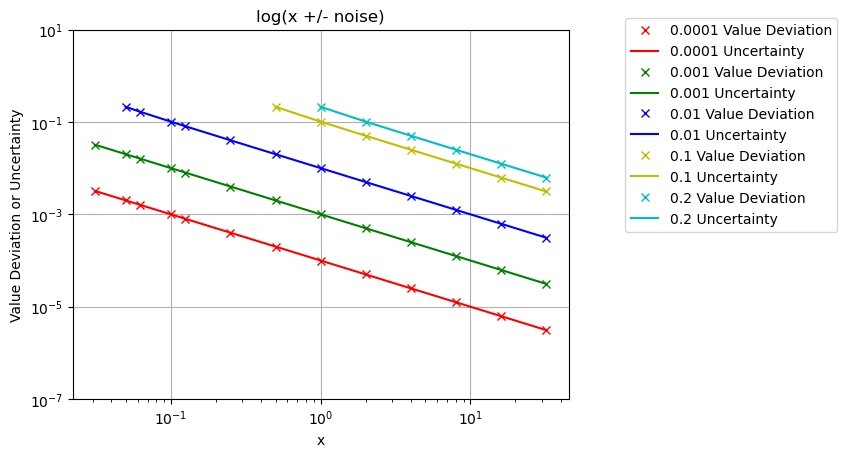

In [37]:
PlotValues(noiseType='Uniform', ylim=[1e-7, 1e1])

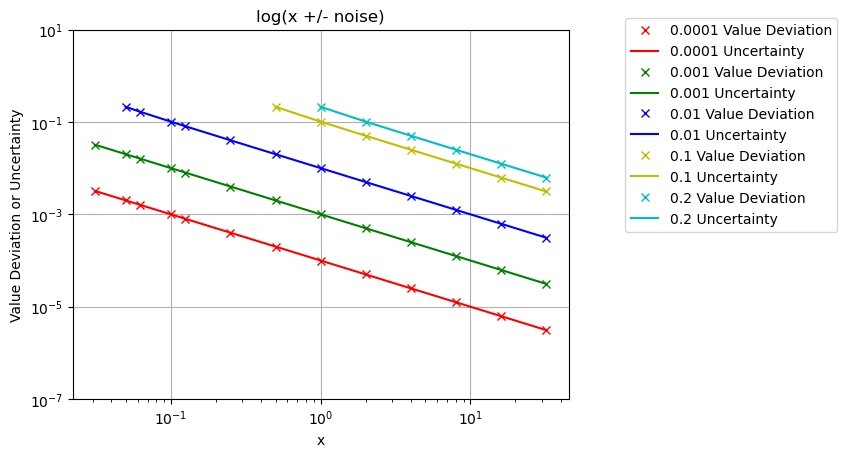

In [38]:
PlotValues(ylim=[1e-7, 1e1], noiseType='Uniform')

In [39]:
def PlotErrorDev( noiseType='Gaussian', sNoise=sNoise,
                  sColor = ['r','g','b','y','c','m'], ylim=(1e-6, 1e1) ):
    
    fig, ax = plt.subplots()
    ax.set_title(r'$\log(x \pm \delta x)$ with ' + noiseType + ' noise')
    ax.set_xlabel('x')
    ax.set_xscale('log')
    ax.set_ylabel('Uncertainty or Value Deviation')
    ax.set_yscale('log')
    ax.set_ylim(ylim)
    ax.grid(True)
    for noise, color in zip(sNoise, sColor):
        dfPlot = df[(df['NoiseType']==noiseType) & (df['Noise']==noise)].sort_values('X')
        if dfPlot.empty:
            continue
        ax.plot(dfPlot['X'], dfPlot['Uncertainty'], ''.join([color, '-']), label=f'{noise} Uncertainty')
        ax.plot(dfPlot['X'], dfPlot['Value Deviation'], ''.join([color, 'x']), label=f'{noise} Value Deviation')

    ax2 = ax.twinx()
    ax2.set_xscale('log')
    ax2.set_ylabel('Error Deviation')
    for noise, color in zip(sNoise, sColor):
        dfPlot = df[(df['NoiseType']==noiseType) & (df['Noise']==noise)].sort_values('X')
        if dfPlot.empty:
            continue
        ax2.plot(dfPlot['X'], dfPlot['Error Deviation'], ''.join([color, '--']), label=f'{noise} Error Deviation')

    ax.legend(bbox_to_anchor=(1.6, 1.0))
    ax2.legend(bbox_to_anchor=(1.6, 0.3))

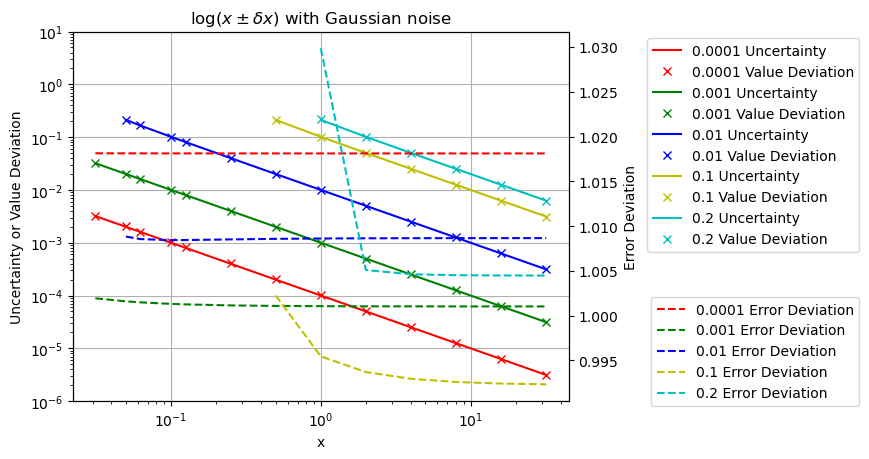

In [40]:
PlotErrorDev()

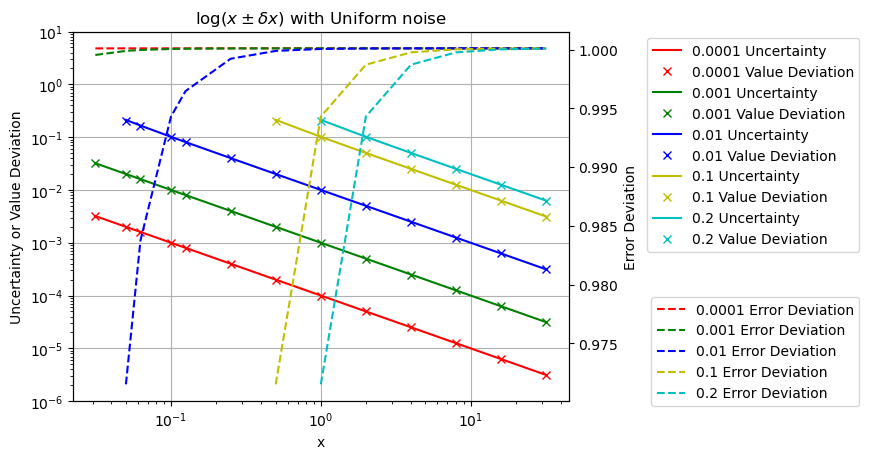

In [41]:
PlotErrorDev('Uniform')

In [42]:
def PlotErrorDev( noiseType='Gaussian', sNoiseStyleMarker=[(0.2,'-','<'), (1e-1,'-.','>'), (1e-2,':','^'), (1e-3,'--','v')],
                  ylim=(1e-6, 1e1) ):
    
    fig, ax = plt.subplots()
    ax.set_title(r'$\log(x \pm \delta x)$ with ' + noiseType + ' noise')
    ax.set_xlabel('x')
    ax.set_xscale('log')
    ax.set_ylabel('Uncertainty or Value Deviation')
    ax.set_yscale('log')
    ax.set_ylim(ylim)
    ax.grid(True)
    for noise, style, marker in sNoiseStyleMarker:
        dfPlot = df[(df['NoiseType']==noiseType) & (df['Noise']==noise)].sort_values('X')
        if dfPlot.empty:
            continue
        ax.plot(dfPlot['X'], dfPlot['Uncertainty'], f'k{style}', label=f'{noise} Uncertainty')
        ax.plot(dfPlot['X'], dfPlot['Value Deviation'], f'k{marker}', label=f'{noise} Value Deviation')

    ax2 = ax.twinx()
    ax2.set_ylabel('Error Deviation')
    for noise, style, marker in sNoiseStyleMarker:
        dfPlot = df[(df['NoiseType']==noiseType) & (df['Noise']==noise)].sort_values('X')
        if dfPlot.empty:
            continue
        ax2.plot(dfPlot['X'], dfPlot['Error Deviation'], c='gray', ls=style, label=f'{noise} Error Deviation')

    ax.legend(bbox_to_anchor=(1.58, 0.5))
    ax2.legend(bbox_to_anchor=(1.58, 0.9))

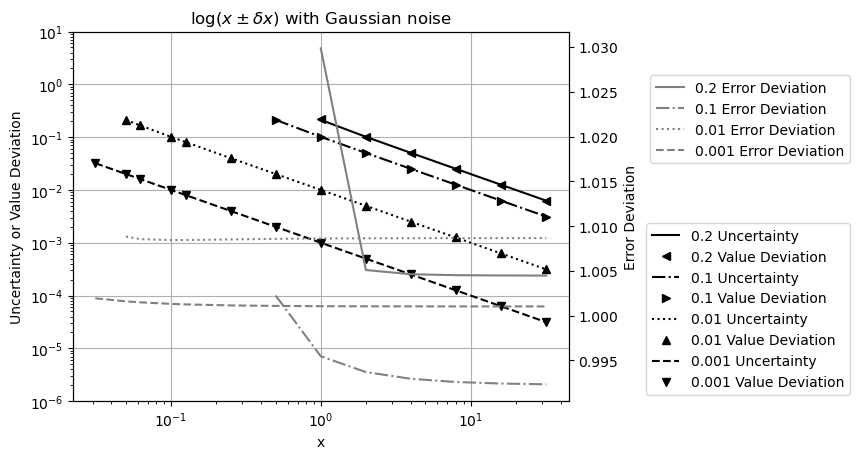

In [43]:
PlotErrorDev()

In [44]:
df[(df['NoiseType']=='Gaussian') & (df['Noise']>=1e-15)]['Error Deviation'].describe()

count    194.000000
mean       0.992009
std        0.090626
min        0.029775
25%        0.999468
50%        1.002548
75%        1.008664
max        1.029869
Name: Error Deviation, dtype: float64

# Mean vs Bias 

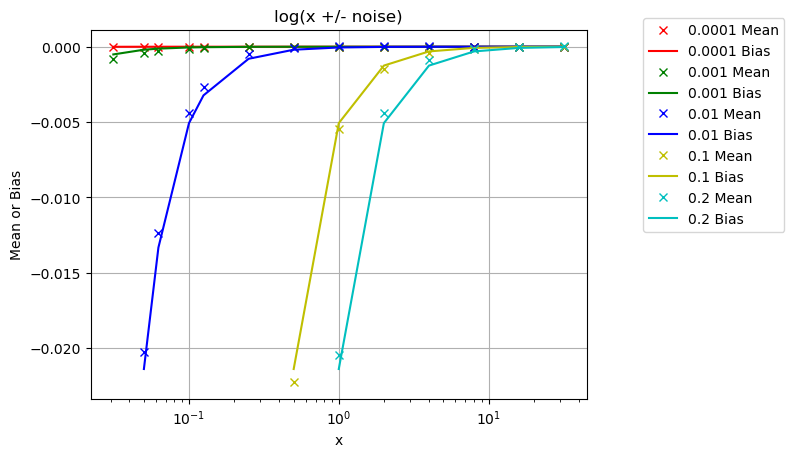

In [45]:
PlotValues(sValue=['Mean', 'Bias'], sStyle=['x', '-'], logy=False)

# Error Maximum and Minimum

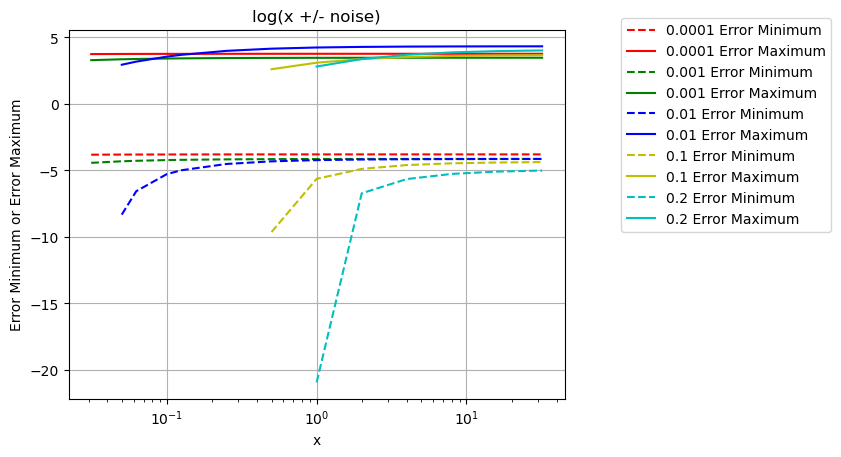

In [46]:
PlotValues(sValue=['Error Minimum', 'Error Maximum'], sStyle=['--', '-'], logy=False)

# vs Noise vs X

In [47]:
df[df['Uncertainty']==0].head()

,NoiseType,Noise,X,log,Error Deviation,Error Minimum,Error Maximum,Value Deviation,Uncertainty,Mean,...,1.1,1.3,1.5,1.7,1.9,2.1,2.3,2.5,2.7,2.9


In [48]:
def PlotSurface(value, noiseType, maxNoise=1e-2, xlim=(-10,10)):
    '''
    Some data are missing for noise>=1e-2 for pivot
    '''
    logz = (value == 'Uncertainty')
    dfOrderVsNoise = df[(df['NoiseType']==noiseType) & (df['Noise']>0) & (df['Noise']<maxNoise)
                        & (df['X']>=xlim[0]) & (df['X']<=xlim[1])]\
                .pivot(index='Noise', columns='X', values=value)
    sOrder = np.log2(dfOrderVsNoise.columns.values)
    sNoise = dfOrderVsNoise.index.values
    sX, sY = np.meshgrid(sOrder, sNoise)
    sY = np.log10(sY)
    sZ = np.log10(dfOrderVsNoise.values) if logz else dfOrderVsNoise.values
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.view_init(30, -45) if logz else ax.view_init(30, 45)
    surf = ax.plot_surface( sX, sY, sZ, cmap=plt.cm.spring if logz else plt.cm.winter )
    cb = fig.colorbar(surf, shrink=0.5, aspect=5, pad=0.15)
    
    ax.set_title(r'$e^{x \pm \delta x}$ with ' + noiseType + ' noise')
    
    ax.set_xlabel('X')
    sXTick = [sOrder[i] for i in range(0, len(sOrder), 2)]
    ax.set_xticks(sXTick, [f'{x}' for x in sXTick])
    
    ax.set_ylabel('Input Noise')
    sYTick = [sNoise[i] for i in range(0, len(sNoise), 3)]
    ax.set_yticks(np.log10(sYTick), [f'{y:.1e}' for y in sYTick])
    
    ax.set_zlabel(value)
    if value == 'Error Deviation':
        pass
        # TODO: adjust color range 
        # ax.set_zlim([0, 2])
        # cb.set_clim([0, 2])
    if logz:
        zMin = int(math.floor(np.min(sZ)))
        zMax = int(math.ceil(np.max(sZ)))
        sZTick = range(zMin, zMax, int(math.ceil((zMax - zMin)/10)))
        ax.set_zticks(sZTick, [f'1e{z:+}' for z in sZTick])


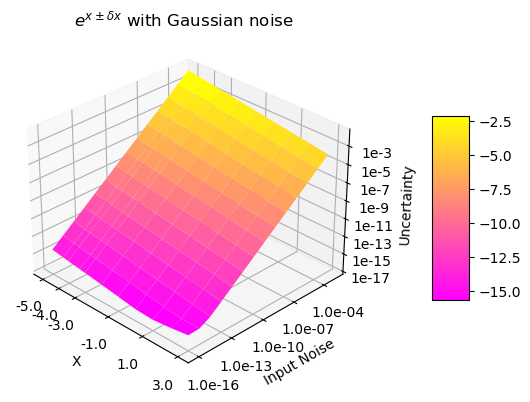

In [49]:
dfOrderVsNoise = PlotSurface('Uncertainty', 'Gaussian')

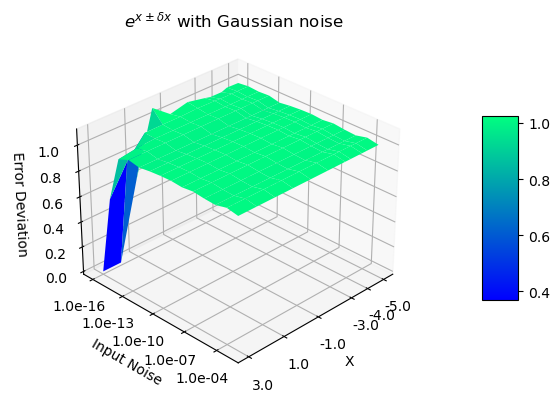

In [50]:
PlotSurface('Error Deviation', 'Gaussian')

# Histogram

In [51]:
sHisto = [str(i/10) for i in range(-29, 30, 2)]
df[sHisto].head()

,-2.9,-2.7,-2.5,-2.3,-2.1,-1.9,-1.7,-1.5,-1.3,-1.1,...,1.1,1.3,1.5,1.7,1.9,2.1,2.3,2.5,2.7,2.9
0,0.015630,0.026218,0.031764,0.047898,0.058990,0.073107,0.083695,0.123525,0.151760,0.202178,...,0.236967,0.172431,0.094787,0.061511,0.027730,0.012605,0.007563,0.000000,0.000000,0.001008
1,0.000000,0.000000,0.000000,0.000000,0.005999,0.204980,0.212979,0.222978,0.231977,0.242476,...,0.386461,0.402960,0.006499,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.006531,0.016580,0.027633,0.040193,0.059285,0.076367,0.096965,0.121081,0.164791,0.211013,...,0.226085,0.182878,0.130627,0.076367,0.053758,0.031652,0.014068,0.010048,0.005024,0.001005
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.094491,0.245975,0.251475,0.255974,0.261974,...,0.326967,0.333467,0.300970,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.008529,0.010536,0.019567,0.036123,0.054184,0.078768,0.092816,0.122416,0.176099,0.209713,...,0.230283,0.183123,0.140979,0.083283,0.059703,0.039133,0.022577,0.009532,0.009532,0.004515


In [52]:
def PlotHisto( sNoiseType=['Gaussian'], sNoise=df['Noise'].unique(), sX=df['X'].unique() ):
    df['algo'] = df['NoiseType'] + " " + df['Noise'].astype(str) + " " + df['X'].astype(str)
    dfPlot = df[(df['NoiseType'].isin(sNoiseType)) & (df['Noise'].isin(sNoise)) & (df['X'].isin(sX))].set_index('algo')
    # return dfPlot
    ax = dfPlot[sHisto].T.plot()
    ax.legend(bbox_to_anchor=(1.1, 1.05))    


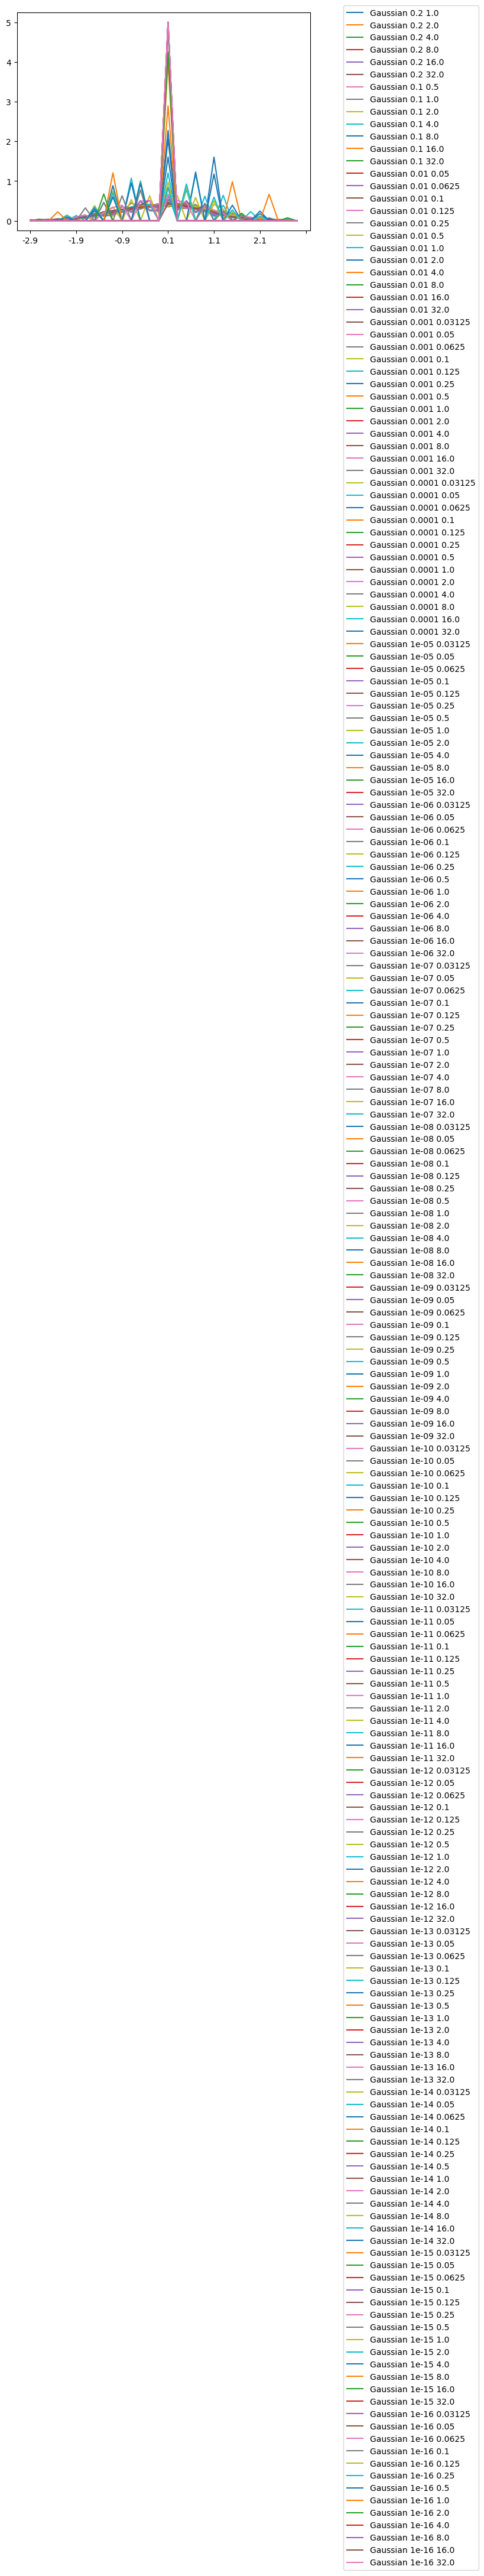

In [53]:
PlotHisto(sNoiseType=['Gaussian'])

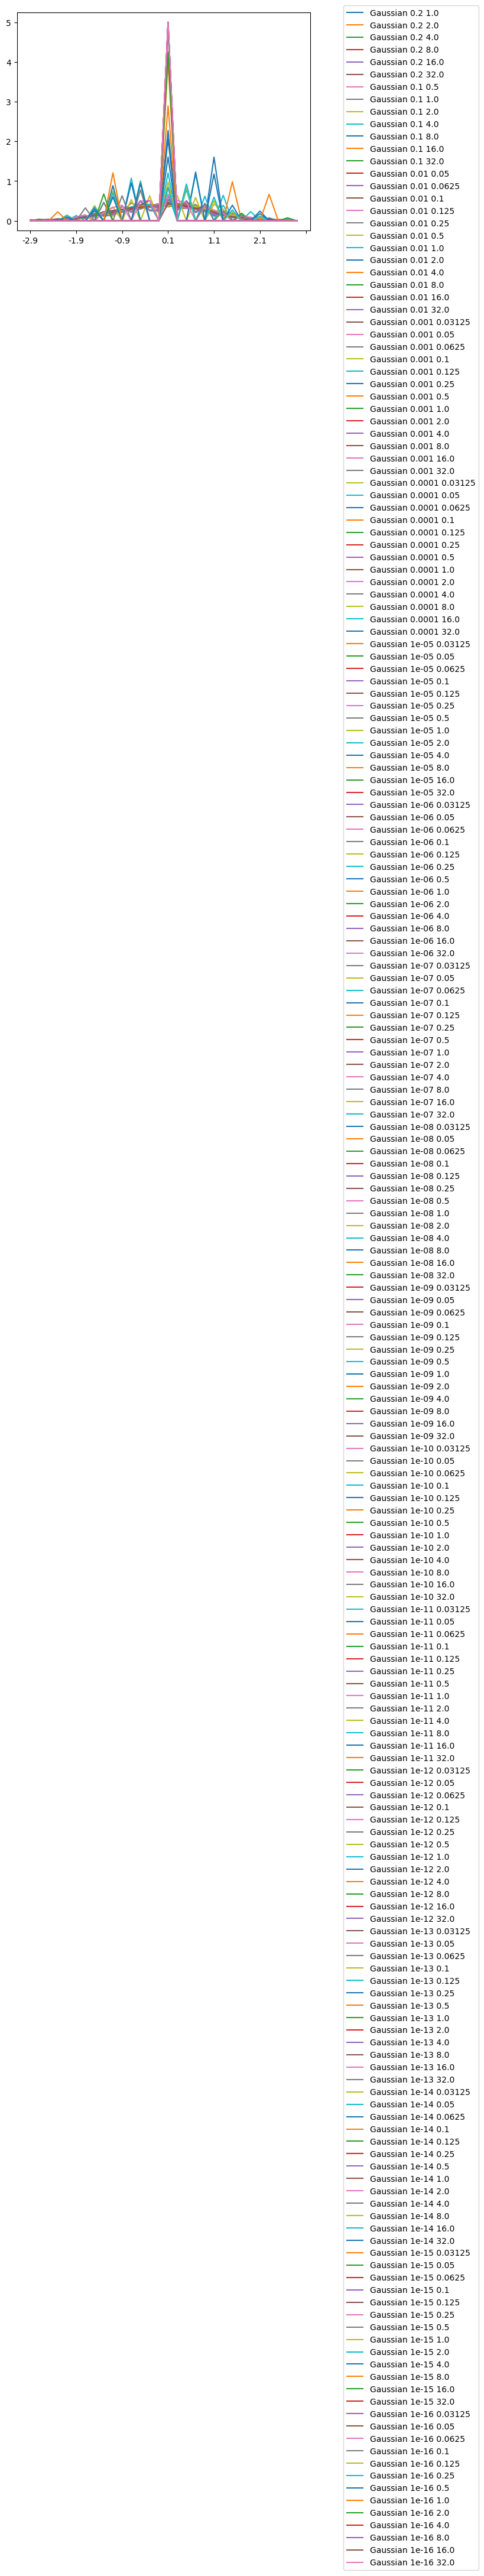

In [54]:
PlotHisto()

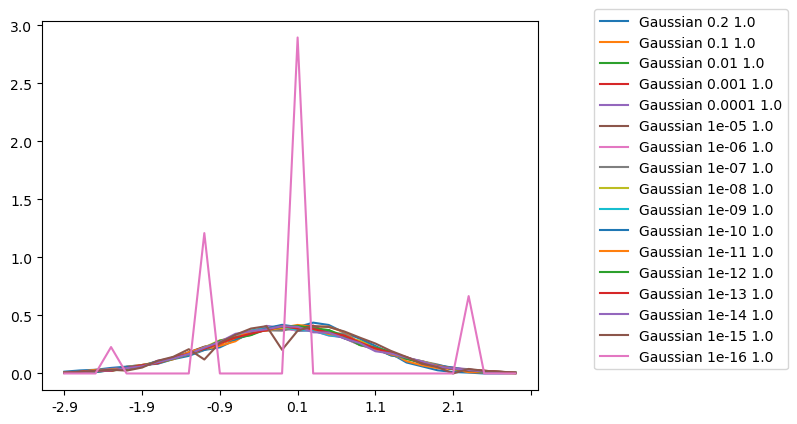

In [55]:
PlotHisto(sX=[1])

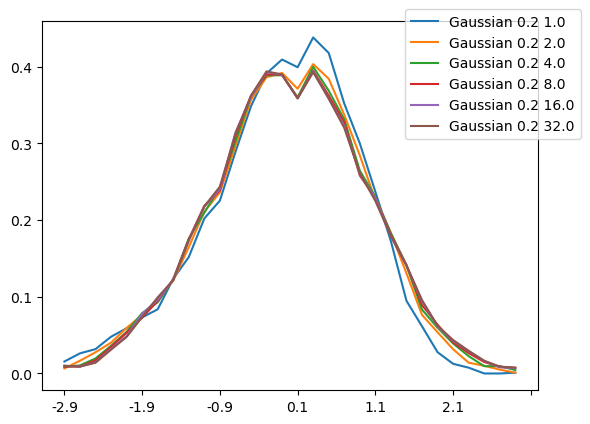

In [56]:
PlotHisto(sNoise=[0.2])